In [43]:
import pandas as pd
import numpy as np

# Scikit-Learn:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Keras:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# Sampling:
from imblearn.over_sampling import SMOTE, ADASYN

# XGBoost:
import xgboost as xgb

# Plots and Graphs:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt 
%matplotlib inline

# Other:
import warnings
warnings.filterwarnings('ignore')
# So we can see the entire column:
pd.set_option('display.max_colwidth', -1)


# Keras NLP
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Stopwords
from nltk.corpus import stopwords
import string
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [44]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
np.random.seed(0)

# Importing Data

In [3]:
df = pd.read_csv('all-data.csv', names = ['Sentiment', 'Headline'], 
                 encoding='latin-1')
display(df.head())

,Sentiment,Headline
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


In [4]:
df['Headline'] = df['Headline'].astype(str)

# Cleaning

## Ternary Encoding:

In [5]:

# TERNARY
# Encoding Sentiment
lb_make = LabelEncoder()
df["Sentiment"] = lb_make.fit_transform(df["Sentiment"])
df.head()


,Sentiment,Headline
0,1,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,1,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,0,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,2,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,2,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


## Binary Encoding:

In [5]:
#df['Sentiment'] = df['Sentiment'].map(lambda x: 1 if x == 'positive' else 0)
#df.head()

,Sentiment,Headline
0,0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,0,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,0,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,1,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,1,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


In [6]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.add("'s")
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

df['Headline'] = df['Headline'].map(remove_stopwords)

In [7]:
df.head(10)

,Sentiment,Headline
0,1,"according gran , company plans move production russia , although company growing ."
1,1,"technopolis plans develop stages area less 100,000 square meters order host companies working computer technologies telecommunications , statement said ."
2,0,"international electronic industry company elcoteq laid tens employees tallinn facility ; contrary earlier layoffs company contracted ranks office workers , daily postimees reported ."
3,2,new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability .
4,2,"according company updated strategy years 2009-2012 , basware targets long-term net sales growth range 20 % -40 % operating profit margin 10 % -20 % net sales ."
5,2,financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs .
6,2,"last quarter 2010 , componenta net sales doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m ."
7,2,"third quarter 2010 , net sales increased 5.2 % eur 205.5 mn , operating profit 34.9 % eur 23.5 mn ."
8,2,operating profit rose eur 13.1 mn eur 8.7 mn corresponding period 2007 representing 7.7 % net sales .
9,2,"operating profit totalled eur 21.1 mn , eur 18.6 mn 2007 , representing 9.7 % net sales ."


In [ ]:
num_words = len(counter)
max_length = 30 # Maybe change later

## Train Test Split

In [11]:
train_size = int(df.shape[0] * .8)

train_headlines = df.Headline[:train_size]
train_labels = df.Sentiment[:train_size]

test_headlines = df.Headline[train_size:]
test_labels = df.Sentiment[train_size:]

# EDA:

In [24]:
x_train,x_test,y_train,y_test = train_test_split(df.Headline, df.Sentiment, 
                                                 test_size = 0.2 , 
                                                 random_state = 0)

In [30]:
pos = x_train[y_train[y_train== 2].index]
neg = x_train[y_train[y_train== 0].index]
neutral = x_train[y_train[y_train== 1].index]

In [37]:
! pip install wordcloud

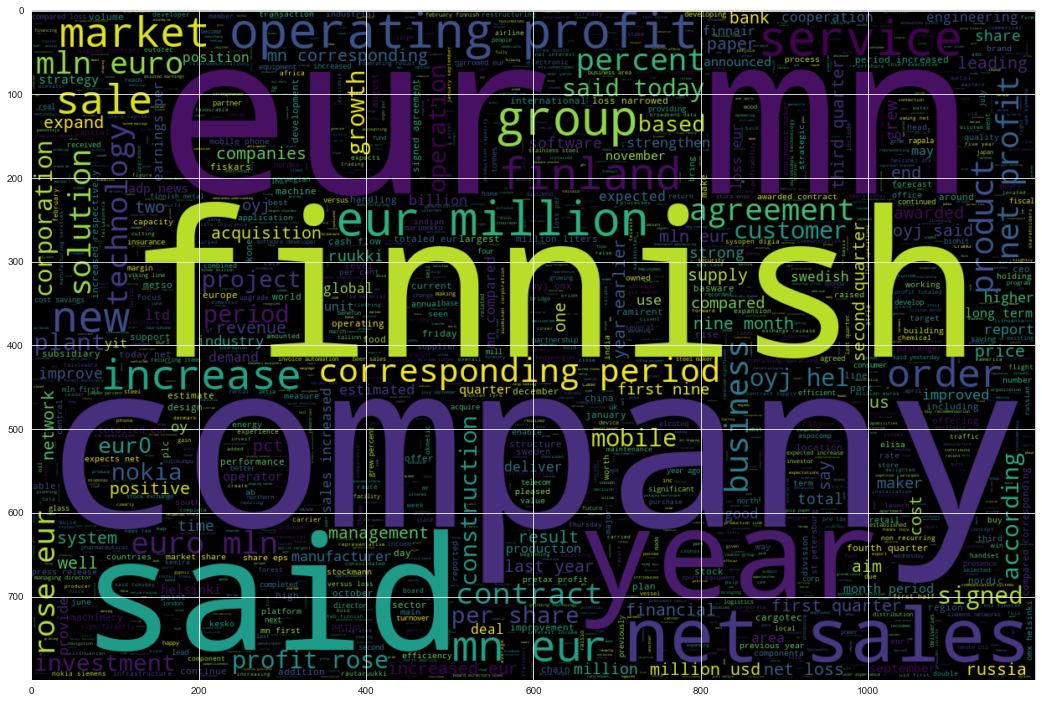

In [38]:
from wordcloud import WordCloud
plt.figure(figsize = (18,24)) # Text Reviews with positive Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(pos))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [40]:
x_train.shape

(3876,)

## Tokenizer

In [45]:
# Keras tokenizer
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(train_headlines)

NameError: name 'num_words' is not defined

In [42]:
word_index = tokenizer.word_index

NameError: name 'tokenizer' is not defined

In [ ]:
word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_headlines)
train_sequences[0]

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen = max_length,
                             padding = 'post', truncating = 'post')
train_padded[0]

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences, maxlen = max_length,
                            padding = 'post', truncating = 'post')

In [ ]:
print (train_padded.shape)
print (test_padded.shape)

## Neural Net:

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 32, input_length = max_length))
model.add(LSTM(64, dropout = .1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'Adam', 
              metrics = ['accuracy'])
model.summary()

In [ ]:
history = model.fit(train_padded, train_labels,
                    epochs = 20,
                    validation_data = (test_padded, test_labels))

# Model Performance

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

# END TEST

# Stop Words

In [ ]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
#stopwords_list += "'s"
print (stopwords_list[:10])


In [ ]:
def process_headline(Headline):
    tokens = nltk.word_tokenize(Headline)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed    

In [ ]:
processed_data = list(map(process_headline, df.Headline))

In [ ]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

In [ ]:
headlines_concat = []
for headline in processed_data:
    headlines_concat += headline

In [ ]:
headline_freqdist = FreqDist(headlines_concat)
headline_freqdist.most_common(10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()


In [ ]:
tf_idf_data_train = vectorizer.fit_transform(df)

In [ ]:
tf_idf_data_train.shape


# Stemming and Lemming